In [1]:
# import Numpy and Pandas
import numpy as np
import pandas as pd


# for reading and displaying images, import imread and matplotlib
from matplotlib import pyplot as plt
from imageio import imread
# for creating validation set, import train_test_split; understand how the function works
from sklearn.model_selection import train_test_split
# for evaluating the model, import accuracy_score from sklearn
from sklearn.metrics import accuracy_score
# Import necessary PyTorch libraries and modules
import torch
import torchvision
from torchvision.transforms import transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# Import dataset from pytorch vision - Fashion MNIST
from torchvision.datasets import FashionMNIST as data 

In [6]:
# load dataset and use dataloader to send the data in batches.
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5), (0.5))])
train_data=data(root=r'C:\Users\hp\Anaconda3\Lib\site-packages\torchvision\datasets',train=True,download=True, transform=transform)
test_data=data(root=r'C:\Users\hp\Anaconda3\Lib\site-packages\torchvision\datasets',train=False,download=True, transform=transform)
# Convert data to tensor and normalise it.
trainloader = torch.utils.data.DataLoader(train_data,batch_size=4,shuffle=True, num_workers=2)
testloader  = torch.utils.data.DataLoader(test_data,batch_size=4,shuffle=True, num_workers=2)
classes=('T-shirt/top',
'Trouser',
'Pullover',
'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot')

2500

In [8]:
# Visualise some random images from the datset. Check the shape of tensors to get a better understanding of the dataset.it
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()


In [9]:
# Define the network architecture(model) using a class.
# Use conv2d layers, activation function after each such layer, use Batchnorm and Maxpooling. Play with these parameters,
# layers and things like kernel size, stride etc and see how it affects your results.
# Finally use a linear layer in the end
# Define the forward pass
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5,stride=1,padding=0)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5,stride=1,padding=0)
        self.fc1 = nn.Linear(16 * 4 * 4, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net=Net()

In [10]:
# Define training the model
    # defining the optimizer
    # defining the loss function
optimizer=optim.SGD(net.parameters(),lr=0.01)
loss=nn.CrossEntropyLoss()
loss_store=[]
    # For each epoch and in each batch:
for epoch in range(2):
    result=0
    for i,data in enumerate(trainloader):
        images,labels=data
        optimizer.zero_grad()
        output=net(images)
        lo=loss(output,labels)
        lo.backward()
        optimizer.step()
        result+=lo.item()
        if i % 2000 == 1999:    
            print('[%d, %5d] loss: %.3f' %(epoch + 1, i + 1, result / 2000))
        loss_store.append(result)
        
        # clear the gradients
        # compute the model output
        # calculate loss; store and print them if you wish to print and see if the loss is decreasing.
        # propagate loss backwards
        # update model weights
        

[1,  2000] loss: 1.302
[1,  4000] loss: 1.944
[1,  6000] loss: 2.498
[1,  8000] loss: 2.998
[1, 10000] loss: 3.478
[1, 12000] loss: 3.931
[1, 14000] loss: 4.366
[2,  2000] loss: 0.409
[2,  4000] loss: 0.783
[2,  6000] loss: 1.160
[2,  8000] loss: 1.537
[2, 10000] loss: 1.891
[2, 12000] loss: 2.255
[2, 14000] loss: 2.616


In [23]:
cost=0.0
for i,data in enumerate(testloader):
    images,labels=data
    pred=net(images)
    pred=torch.argmax(pred,1)
    cost+=int((torch.sum(pred==labels)))
# Evaluate model on test set. This is done in the same way as for training but only till calculating output.
# Then,convert output from tensor to numpy format.
# convert to class labels
# store the predictions
# calculate accuracy of model
# Try to improve accuracy by changing parameters, optimizer, loss functions, epochs etc
# and explain your observations in a text file in the Github repository.

86.79

 Try to improve accuracy by changing parameters, optimizer, loss functions, epochs etc
 and explain your observations in a text file in the Github repository.
  

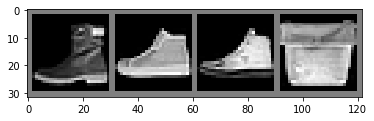

Ankle boot
Ankle boot
Sneaker
Sneaker
Ankle boot
Sneaker
Bag
Bag


In [29]:
# check predictions by printing the output image for random test inputs.
dataiter=iter(testloader)
images,labels=dataiter.next()
imshow(torchvision.utils.make_grid(images))
pred=net(images)
pred=torch.argmax(pred,1)
for i in range(4):
    print(classes[labels[i]])
    print(classes[pred[i]])

(tensor([[[-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.000

array([7, 3, 6, 0], dtype=int64)